In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.chrome.options import Options 
from selenium.common.exceptions import TimeoutException 
from selenium.webdriver.common.keys import Keys

import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
service = Service(executable_path = "C:/Users/MATHEUS/Desktop/Biblioteca/Python/chromedriver.exe")
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service)

In [3]:
driver.get('https://www.voeazul.com.br/br/pt/home/selecao-voo?c[0].ds=REC&c[0].std=06/30/2023&c[0].as=RIO&p[0].t=ADT&p[0].c=1&p[0].cp=false&f.dl=3&f.dr=3&cc=BRL')

all_loaded = False
while all_loaded == False:
    try:
        wait = WebDriverWait(driver, 30)
        element = wait.until(EC.element_to_be_clickable((By.ID, "load-more-button")))
        #element = driver.find_element(By.ID, "load-more-button")
        driver.execute_script("arguments[0].click();", element)
    except:
        all_loaded = True

In [44]:
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')

<html data-react-helmet="lang,dir" dir="ltr" lang="pt" style="--vh: 5.67px;"><head>
<style type="text/css">.azul-main, .azul-aside { opacity: 0; animation: 199ms ease-out 0s 1 normal none running animation-5ich1p; } @media (min-width: 1024px) {
  .Azul-Transactional-Header { opacity: 0; animation: 199ms ease-out 0s 1 normal none running animation-5ich1p; }
} .azul-main, .azul-aside, .Azul-Checkin, .Azul-Transactional-Header, .transactional-container { transition: opacity 199ms ease 0s; } .AzulPage .azul-main, .AzulPage .Azul-Checkin, .AzulPage .Azul-Transactional-Header, .AzulPage .transactional-container { opacity: 1; animation: 199ms ease-out 0s 1 normal none running animation-ox4vyo; } @media (min-width: 1024px) {
  .AzulPage .azul-aside { opacity: 1; animation: 199ms ease-out 0s 1 normal none running animation-ox4vyo; }
} .azul-page-in-editor-mode .azul-main, .azul-page-in-editor-mode .Azul-Checkin, .azul-page-in-editor-mode .Azul-Transactional-Header, .azul-page-in-editor-mode .tr
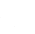
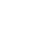
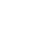

In [45]:
soup

In [46]:
infos = soup.find_all('div', attrs={'class' : 'info-details css-1aersfg'})
partidas = soup.find_all('h4', attrs = {'class':'departure css-qtfatn' })
chegadas = soup.find_all('h4', attrs = {'class':'arrival css-1kh4opz' })
preços = soup.find_all('div', attrs = {'class':'fare css-t6mqli' })

In [3]:
def precificar(p):
    '''
    Transforma uma string de numeros, com decimais separados por virgula, em um float
    '''
    # Remove os pontos de milhares
    temp = p.replace(".", "")
    # Troca as virgulas por pontos e transforma em float
    final = float(temp.replace(",", "."))
    
    return final

In [48]:
for partida in partidas:
    print(partida.text[:5])

03:55
09:10
12:45
17:40
03:05
03:15
08:25
08:45
08:45
13:00
13:25
15:30
17:35
02:30
03:25
08:05
08:05
08:30
08:30
08:30
12:50
12:50
12:50
12:50


In [49]:
voos = {}

for i in range(0, len(preços)):
    
    HORA_PART = partidas[i].text[:5]
    AERO_PART = partidas[i].text[5:]
    HORA_DEST = chegadas[i].text[:5]
    AERO_DEST = chegadas[i].text[5:]
    
    tag = AERO_PART + '_' + HORA_PART + '-' + AERO_DEST + '_' + HORA_DEST
    
    passagem = {
        "Companhia": "Azul",
        "Horário de Partida" : HORA_PART,
        "Aeroporto de Partida" : AERO_PART,
        "Horário de Destino": HORA_DEST,
        "Aeroporto de Destino": AERO_DEST,
        "Preço (R$)": precificar(preços[i].text[14:]),
        "Detalhes": infos[i].text,
        "Tag": tag
    }
    
    voos.update({i:passagem})
    

In [51]:
df = pd.DataFrame.from_dict(voos, orient='index')
df

,Companhia,Horário de Partida,Aeroporto de Partida,Horário de Destino,Aeroporto de Destino,Preço (R$),Detalhes,Tag
0,Azul,03:55,REC,06:45,SDU,1354.64,Voo 4824 Direto,REC_03:55-SDU_06:45
1,Azul,09:10,REC,12:05,SDU,3756.64,Voo 5024 Direto,REC_09:10-SDU_12:05
2,Azul,12:45,REC,15:35,SDU,3756.64,Voo 2990 Direto,REC_12:45-SDU_15:35
3,Azul,17:40,REC,20:35,SDU,3756.64,Voo 4631 Direto,REC_17:40-SDU_20:35
4,Azul,03:05,REC,11:05,SDU,1500.64,1 conexão • Voo 4153,REC_03:05-SDU_11:05
5,Azul,03:15,REC,09:05,GIG,1215.64,1 conexão • Voo 4335,REC_03:15-GIG_09:05
6,Azul,08:25,REC,15:10,GIG,3756.64,1 conexão • Voo 4508,REC_08:25-GIG_15:10
7,Azul,08:45,REC,14:00,SDU,3756.64,1 conexão • Voo 4619,REC_08:45-SDU_14:00
8,Azul,08:45,REC,17:40,SDU,3756.64,1 conexão • Voo 4619,REC_08:45-SDU_17:40
9,Azul,13:00,REC,20:05,GIG,3756.64,1 conexão • Voo 2923,REC_13:00-GIG_20:05


In [60]:
df.to_pickle(r"C:\Users\MATHEUS\Desktop\Biblioteca\Python\WebScrapping_Passagens\Azul\18-06-2023\19-06-2023.pkl")

In [8]:
driver.quit()

# Collecting All the Data

In [4]:
def get_dates(today = dt.datetime.today()):
    '''
    Dado o dia de hoje, computa todas as datas de quinze em quinze dias, começando por amanhã
    e terminando em 360 dias. Retorna as datas numa lista em formato %d%m%Y
    '''
    list_days = [1] + [i*15 for i in range(1, 25)]
    dates = [(today + dt.timedelta(days=day)) for day in list_days]
    dates_mdY = [date.strftime('%m/%d/%Y') for date in dates]
    dates_dmY = [date.strftime('%d/%m/%Y') for date in dates]
    dates_hifen = [date.strftime('%d-%m-%Y') for date in dates]
    
    return dates_mdY, dates_dmY, dates_hifen

In [6]:
def get_passagens(partida, destino):
    
    
    dt_mdy, dt_dmy, dt_hifen = get_dates()
    
    for index in range(0, len(dt_mdy)):
        
        print(f"Carregando página do dia {dt_dmy[index]}.")
        driver.get(f'https://www.voeazul.com.br/br/pt/home/selecao-voo?c[0].ds={partida}&c[0].std={dt_mdy[index]}&c[0].as={destino}&p[0].t=ADT&p[0].c=1&p[0].cp=false&f.dl=3&f.dr=3&cc=BRL')
        
        print("Carregando todas as passagens disponíveis...")
        all_loaded = False
        while all_loaded == False:
            try:
                wait = WebDriverWait(driver, 30)
                element = wait.until(EC.element_to_be_clickable((By.ID, "load-more-button")))
                #element = driver.find_element(By.ID, "load-more-button")
                driver.execute_script("arguments[0].click();", element)
            except:
                all_loaded = True
        
        print("Obtendo o código fonte e coletando os dados.")
        html = driver.page_source
        soup = BeautifulSoup(html, 'lxml')
        
        #infos = soup.find_all('div', attrs={'class' : 'info-details css-1aersfg'})
        infos = soup.find_all('p', attrs={'class' : 'flight-leg-info'})
        partidas = soup.find_all('h4', attrs = {'class':'departure css-qtfatn' })
        chegadas = soup.find_all('h4', attrs = {'class':'arrival css-1kh4opz' })
        preços = soup.find_all('div', attrs = {'class':'fare css-t6mqli' })
        
        print("Salvando os dados no DataFrame e salvando em arquivo Pickle.")
        voos = {}
        for i in range(0, len(preços)):

            HORA_PART = partidas[i].text[:5]
            AERO_PART = partidas[i].text[5:]
            HORA_DEST = chegadas[i].text[:5]
            AERO_DEST = chegadas[i].text[5:]

            tag = AERO_PART + '_' + HORA_PART + '-' + AERO_DEST + '_' + HORA_DEST

            passagem = {
                "Companhia": "Azul",
                "Data da Viagem": dt_dmy[index],
                "Horário de Partida" : HORA_PART,
                "Aeroporto de Partida" : AERO_PART,
                "Horário de Destino": HORA_DEST,
                "Aeroporto de Destino": AERO_DEST,
                "Preço (R$)": precificar(preços[i].text[14:]),
                "Detalhes": infos[i].text,
                "Tag": tag
            }

            voos.update({i:passagem})
            
        df = pd.DataFrame.from_dict(voos, orient='index')
            
        df.to_pickle(f"C:/Users/MATHEUS/Desktop/Biblioteca/Python/WebScrapping_Passagens/Azul/21-07-2023/{dt_hifen[index]}.pkl")
        
        print(f"Concluído a coleta do dia {dt_dmy[index]} ({index}/{len(dt_mdy) - 1}).\n")

In [7]:
PARTIDA = "REC"
DESTINO = "RIO"

get_passagens(PARTIDA, DESTINO)

Carregando página do dia 22/07/2023.
Carregando todas as passagens disponíveis...
Obtendo o código fonte e coletando os dados.
Salvando os dados no DataFrame e salvando em arquivo Pickle.
Concluído a coleta do dia 22/07/2023 (0/24).

Carregando página do dia 05/08/2023.
Carregando todas as passagens disponíveis...
Obtendo o código fonte e coletando os dados.
Salvando os dados no DataFrame e salvando em arquivo Pickle.
Concluído a coleta do dia 05/08/2023 (1/24).

Carregando página do dia 20/08/2023.
Carregando todas as passagens disponíveis...
Obtendo o código fonte e coletando os dados.
Salvando os dados no DataFrame e salvando em arquivo Pickle.
Concluído a coleta do dia 20/08/2023 (2/24).

Carregando página do dia 04/09/2023.
Carregando todas as passagens disponíveis...
Obtendo o código fonte e coletando os dados.
Salvando os dados no DataFrame e salvando em arquivo Pickle.
Concluído a coleta do dia 04/09/2023 (3/24).

Carregando página do dia 19/09/2023.
Carregando todas as passage

In [8]:
driver.quit()

In [8]:
pd.read_pickle("C:/Users/MATHEUS/Desktop/Biblioteca/Python/WebScrapping_Passagens/Azul/29-06-2023/24-04-2024.pkl")

,Companhia,Data da Viagem,Horário de Partida,Aeroporto de Partida,Horário de Destino,Aeroporto de Destino,Preço (R$),Detalhes,Tag
0,Azul,24/04/2024,03:55,REC,06:45,SDU,766.64,Voo 4824 Direto,REC_03:55-SDU_06:45
1,Azul,24/04/2024,09:10,REC,12:05,SDU,766.64,Voo 5024 Direto,REC_09:10-SDU_12:05
2,Azul,24/04/2024,12:50,REC,15:45,SDU,766.64,Voo 2990 Direto,REC_12:50-SDU_15:45
3,Azul,24/04/2024,17:40,REC,20:35,SDU,766.64,Voo 4631 Direto,REC_17:40-SDU_20:35
4,Azul,24/04/2024,03:05,REC,11:05,SDU,816.64,1 conexão • Voo 4153,REC_03:05-SDU_11:05
5,Azul,24/04/2024,03:15,REC,09:05,GIG,802.64,1 conexão • Voo 4335,REC_03:15-GIG_09:05
6,Azul,24/04/2024,03:15,REC,11:55,GIG,802.64,1 conexão • Voo 4335,REC_03:15-GIG_11:55
7,Azul,24/04/2024,08:25,REC,14:30,GIG,802.64,1 conexão • Voo 4508,REC_08:25-GIG_14:30
8,Azul,24/04/2024,08:50,REC,14:00,SDU,906.64,1 conexão • Voo 4619,REC_08:50-SDU_14:00
9,Azul,24/04/2024,08:50,REC,17:40,SDU,906.64,1 conexão • Voo 4619,REC_08:50-SDU_17:40


In [18]:
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
        
infos = soup.find_all('p', attrs={'class' : 'flight-leg-info'})
partidas = soup.find_all('h4', attrs = {'class':'departure css-qtfatn' })
chegadas = soup.find_all('h4', attrs = {'class':'arrival css-1kh4opz' })
preços = soup.find_all('div', attrs = {'class':'fare css-t6mqli' })

In [19]:
infos

[<p class="flight-leg-info"><button aria-label="" class="css-mmwai3" tabindex="-1" type="button">Voo 4824 </button> Direto</p>,
 <p class="flight-leg-info"><button aria-label="" class="css-mmwai3" tabindex="-1" type="button">Voo 5024 </button> Direto</p>,
 <p class="flight-leg-info"><button aria-label="" class="css-mmwai3" tabindex="-1" type="button">Voo 2990 </button> Direto</p>,
 <p class="flight-leg-info"><button aria-label="" class="css-mmwai3" tabindex="-1" type="button">Voo 4631 </button> Direto</p>,
 <p class="flight-leg-info">1 conexão    • <button aria-label="" class="css-mmwai3" tabindex="-1" type="button">Voo 4605</button></p>,
 <p class="flight-leg-info">1 conexão    • <button aria-label="" class="css-mmwai3" tabindex="-1" type="button">Voo 4104</button></p>,
 <p class="flight-leg-info">1 conexão    • <button aria-label="" class="css-mmwai3" tabindex="-1" type="button">Voo 4153</button></p>,
 <p class="flight-leg-info">1 conexão    • <button aria-label="" class="css-mmwai3"